<a href="https://colab.research.google.com/github/derekgao2/NBA-Injuries/blob/main/(3)_NBAInjuries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to evaluate the effect of a career-altering injury on NBA players, but I will probably extend this research to other sports leagues in the future. I have been watching the NBA since I was young and have seen players like Derrick Rose lose their promising careers to multiple injuries while others return and play like superstars again.

Here is a link to the dataset of all NBA injuries from 2010 to 2020 from: https://www.kaggle.com/datasets/ghopkins/nba-injuries-2010-2018. First, I filtered through the data to find all the players who suffered potential career-altering injuries, such as a torn ACL, torn Achilles, or torn meniscus.

In [ ]:
import pandas as pd
data = pd.read_csv('injuries.csv')

for i in range(27105):
  injury = (data['Notes'].values)[i]
  for j in range(len(injury)-4):
    if(injury[j:j+4] == 'torn' and injury[-5:] != "(DNP)" and injury[-5:] != "(DTD)"):
      injury += ", " + data['Date'].values[i]
      print(data['Relinquished'].values[i], "  ", injury)
      break

Jonas Jerebko    torn right Achilles tendon (out indefinitely), 2010-10-06
Jeff Ayres    torn ACL in right knee (out indefinitely), 2010-10-08
Jonas Jerebko    surgery to repair torn right Achilles tendon, 2010-10-08
Al Harrington    partially torn plantar fascia in left foot (out indefinitely), 2010-10-09
Kendrick Perkins    placed on IL recovering from surgery on right knee to repair torn ACL, 2010-10-26
Andrew Bynum    placed on IL recovering from surgery on right knee to repair torn ligaments, 2010-10-26
Michael Redd    placed on IL recovering from surgery on left knee to repair torn ACL, 2010-10-27
Mehmet Okur    placed on IL recovering from surgery to repair torn left Achilles tendon, 2010-10-27
Chris Andersen    placed on IL recovering from surgery on right knee to repair partially torn patella tendon, 2010-10-27
Jonas Jerebko    placed on IL recovering from surgery to repair torn right Achilles tendon (out for season), 2010-10-27
Ed Davis     placed on IL recovering from arthro

I added a couple more players to the list that were not mentioned above but also suffered one of the three injuries. Then, I looked at two of the best advanced stat metrics for these players in the regular seasons before and after injury. These metrics are luck-adjusted player estimate using a box prior regularized on-off (LEBRON) and box plus-minus (BPM). The links for these metrics come from:

https://www.bball-index.com/lebron-database/ - LEBRON

https://www.basketball-reference.com/leagues/NBA_2021_advanced.html - BPM

In the injury type column, 0 stands for a torn ligament/tendon in the knee, 1 stands for a torn ligament/tendon in the foot, and 2 stands for torn cartilage, including the meniscus; season is the year the injury occurred. To calculate the stat difference column, I took the average of the two seasons before and after injury and found their difference. If a player did not play two seasons before or after, I used up to two. A difference of -10 in both columns indicates that the player did not return to the NBA after the injury. Since Colab doesn't save .txt files, I created a Google Doc with all the data to copy over once I'm done collecting data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stats = pd.read_csv("playerStats.txt")
print(stats)

        player  injury type  season  LEBRON diff  BPM diff  age  height  \
0      Perkins            0    2010       -2.280     -1.65   25      82   
1         Paul            2    2010        2.895      1.00   24      72   
2         Okur            1    2010       -2.040     -4.30   31      83   
3     Andersen            0    2010       -1.575      0.65   32      82   
4       Howard            0    2010       -0.505     -2.10   30      79   
..         ...          ...     ...          ...       ...  ...     ...   
108      Green            2    2020        1.230      0.70   27      76   
109  Porzingis            2    2020       -1.105      1.35   25      87   
110  Dinwiddie            0    2021        0.035      0.15   27      77   
111      Fultz            0    2021        1.825      2.65   22      75   
112  T. Bryant            0    2021       -0.460     -2.20   23      82   

     weight  previous injury  change  O-LEBRON diff  D-LEBRON diff  \
0       270                0 

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

ind = stats[["injury type", "age", "height", "weight", "avg minutes"]]
dep = stats['change'].values
standard = preprocessing.scale(ind)

ind, dep = shuffle(ind, dep, random_state = 42)
model = KMeans(n_clusters=4, random_state=42)
data_kmeans = model.fit(ind)
data_kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 3, 0, 2, 2, 3, 2, 0, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 1,
       1, 1, 3, 2, 1, 2, 2, 2, 1, 3, 1, 2, 1, 1, 1, 2, 2, 0, 1, 3, 2, 2,
       2, 1, 2, 0, 2, 3, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 3, 1, 1, 2,
       0, 1, 1, 1, 3, 3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 3, 2, 3, 1, 0, 2, 1, 0, 0, 3, 0, 1,
       1, 1, 1], dtype=int32)

In [ ]:

depx = dep[:, np.newaxis]
depp = np.choose(depx, [0,1,2,3,4])




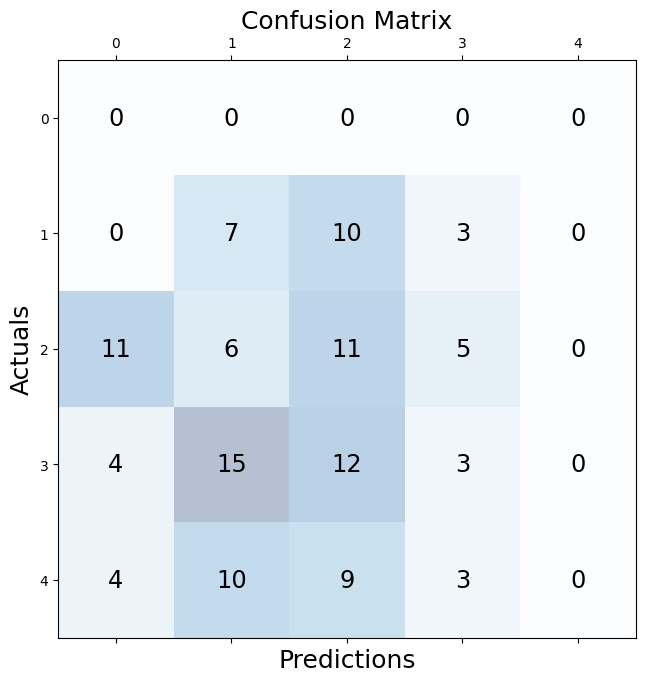

In [ ]:
dep = depp
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(dep, data_kmeans.labels_)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
acl = 0
num1 = 0
achilles = 0
num2 = 0
meniscus = 0
num3 = 0
for i in range(1,113):
  if(stats['injury type'].values[i] == 0):
    acl += stats['age'].values[i]
    num1 += 1
  elif(stats['injury type'].values[i] == 1):
    achilles += stats['age'].values[i]
    num2 += 1
  else:
    meniscus += stats['age'].values[i]
    num3 += 1

print(acl/num1,achilles/num2,meniscus/num3)

25.878048780487806 28.59259259259259 26.772727272727273


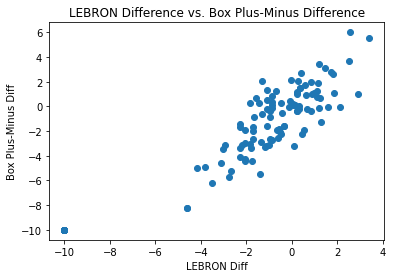

In [ ]:
leb = stats['LEBRON diff'].values
bpm = stats['BPM diff'].values
age = stats['age'].values
height = stats['height'].values
weight = stats['weight'].values
plt.scatter(leb,bpm)
plt.title('LEBRON Difference vs. Box Plus-Minus Difference')
plt.xlabel('LEBRON Diff')
plt.ylabel('Box Plus-Minus Diff')
plt.show()

This graph shows that the two stat metrics corroborate each other in their evaluations of the performances of each player.

I played around with the graphs looking for correlations in the data. The screenshots of the graphs I've created so far are saved in a Google Doc in this same folder.

Text(0.5, 0, 'Height')

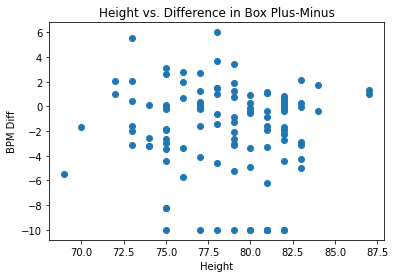

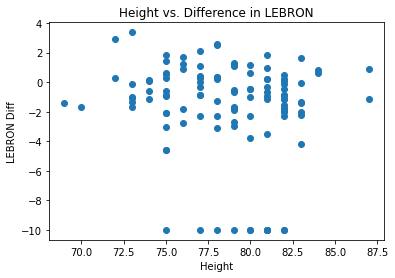

In [ ]:
plt.figure(0)
plt.scatter(height,bpm)
plt.title('Height vs. Difference in Box Plus-Minus')
plt.ylabel('BPM Diff')
plt.xlabel('Height')

plt.figure(1)
plt.scatter(height,leb)
plt.title('Height vs. Difference in LEBRON')
plt.ylabel('LEBRON Diff')
plt.xlabel('Height')

The two graphs that I kept are the ones that seem to have the greatest correlation, even as little as it seems. Athletes did not return to play at all ages but athletes that did were worse as they got older, which makes a lot of sense.

Here I tried creating a regression using all of the factors.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression(fit_intercept = True)
x = stats.drop(['player', 'season', 'LEBRON diff', 'BPM diff','O-LEBRON diff', 'D-LEBRON diff', 'o-change', 'd-change', 'change'], axis = 1).values
y = stats['BPM diff'].values
y = preprocessing.scale(y)
x_train, x_test, y_train, y_test = train_test_split(standard, y, test_size=0.33, random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3488666550667351

Text(0, 0.5, 'Predicted')

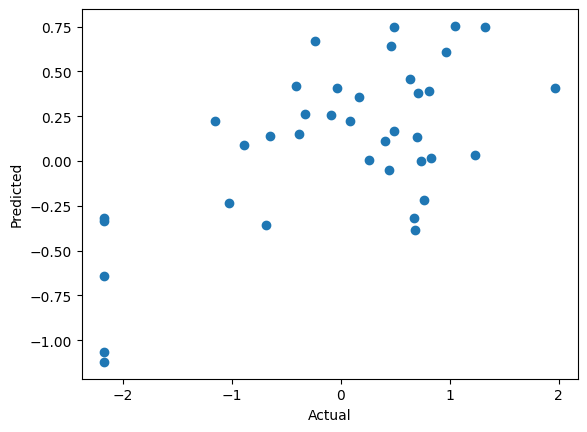

In [ ]:
plt.figure(1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Let's look at the injuries individually

In [ ]:
acl = 0
num1 = 0
achilles = 0
num2 = 0
meniscus = 0
num3 = 0
for i in range(1,113):
  if(stats['injury type'].values[i] == 0):
    acl += stats['LEBRON diff'].values[i]
    num1 += 1
  elif(stats['injury type'].values[i] == 1):
    achilles += stats['LEBRON diff'].values[i]
    num2 += 1
  else:
    meniscus += stats['LEBRON diff'].values[i]
    num3 += 1

print(acl/num1,achilles/num2,meniscus/num3)

-1.7696341463414635 -1.3035185185185183 -1.5422727272727272


In [ ]:
acl = 0
num1 = 0
achilles = 0
num2 = 0
meniscus = 0
num3 = 0
for i in range(1,113):
  if(stats['injury type'].values[i] == 0):
    acl += stats['BPM diff'].values[i]
    num1 += 1
  elif(stats['injury type'].values[i] == 1):
    achilles += stats['BPM diff'].values[i]
    num2 += 1
  else:
    meniscus += stats['BPM diff'].values[i]
    num3 += 1

print(acl/num1,achilles/num2,meniscus/num3)

-2.1829268292682924 -1.8851851851851853 -1.5590909090909089


On average, meniscus tears brought down player LEBRON ratings by more than the average achilles tear. This is actually pretty surprising, although the numbers could be skewed a bit by the -10s for players who did not return. Let's look at the players who did:

In [ ]:
acl = 0
num1 = 0
achilles = 0
num2 = 0
meniscus = 0
num3 = 0
for i in range(0,113):
  if(stats['LEBRON diff'].values[i] == -10):
    continue
  if(stats['injury type'].values[i] == 0):
    acl += stats['LEBRON diff'].values[i]
    num1 += 1
  elif(stats['injury type'].values[i] == 1):
    achilles += stats['LEBRON diff'].values[i]
    num2 += 1
  else:
    meniscus += stats['LEBRON diff'].values[i]
    num3 += 1

print(acl/num1,achilles/num2,meniscus/num3)

-0.41208333333333336 -0.9690384615384615 -0.45794871794871794


In [ ]:
acl = 0
num1 = 0
achilles = 0
num2 = 0
meniscus = 0
num3 = 0
for i in range(0,113):
  if(stats['BPM diff'].values[i] == -10):
    continue
  if(stats['injury type'].values[i] == 0):
    acl += stats['BPM diff'].values[i]
    num1 += 1
  elif(stats['injury type'].values[i] == 1):
    achilles += stats['BPM diff'].values[i]
    num2 += 1
  else:
    meniscus += stats['BPM diff'].values[i]
    num3 += 1

print(acl/num1,achilles/num2,meniscus/num3)

-0.8652777777777779 -1.5730769230769233 -0.47692307692307706


Now it looks like an achilles tear had the biggest impact on players who returned, while ACL tears brought down BPM ratings by more than meniscus tears but LEBRON ratings by less. Seven players did not return after a torn ACL, one after a torn achilles, and five after a torn meniscus. This is also quite interesting: maybe an ACL tear is more likely to end a career but if not the player is more likely to come back and improve? Achilles tears are less likely to end a career but have the largest impact on post-injury performance?


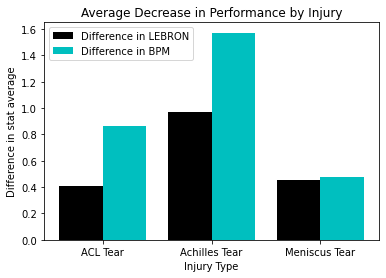

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x1 = ['ACL Tear', 'Achilles Tear', 'Meniscus Tear']
y1 = [0.412, 0.969, 0.458]
y2 = [0.865, 1.573, 0.477]
X_axis = np.arange(len(x1))

plt.bar(X_axis - 0.2, y1, 0.4, label = 'Difference in LEBRON', color='k')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'Difference in BPM', color='c')
plt.xticks(X_axis, x1)
plt.xlabel('Injury Type')
plt.ylabel('Difference in stat average')
plt.title('Average Decrease in Performance by Injury')
plt.legend()

Note that the values shown are the opposite sign, meaning the higher the bar the worse the performance difference

Before running classification, I separated each player's post-recovery performance into 4 classes: 4 if they returned and improved, 3 if they returned and had minimal to no change, 2 if their performance dropped a medium amount, and 1 if their performance significantly decreased. Some of the classes were easy to identify while others were more difficult, since some players had positive LEBRON scores and negative BPM scores, but I did my best to classify each player. These numbers are in the "change" column.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4)

y = stats['change'].values
X_train, X_test, y_train, y_test = train_test_split(standard, y, test_size=0.34)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
clf = clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
print(predictions)

[3 2 2 1 3 2 4 2 3 4 3 4 2 3 3 2 4 4 3 3 3 1 4 4 2 3 3 3 2 4 3 3 3 4 1 3 2
 3 2]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score(y_test, predictions)

0.358974358974359

In [ ]:
confusion_matrix(y_test, predictions, labels = [1,2,3,4])

array([[2, 2, 0, 1],
       [1, 7, 7, 2],
       [1, 3, 1, 1],
       [2, 1, 2, 6]])

In [ ]:
features =stats.drop(['player', 'season', 'LEBRON diff', 'BPM diff','change','O-LEBRON diff','D-LEBRON diff', 'o-change', 'd-change'], axis = 1).columns
clf.feature_importances_

array([0.        , 0.47833517, 0.        , 0.15669181, 0.        ,
       0.36497302])

Graph showing how important each factor was in determining post-recovery performance, not too relevant since accuracy score was so low.

<Axes: >

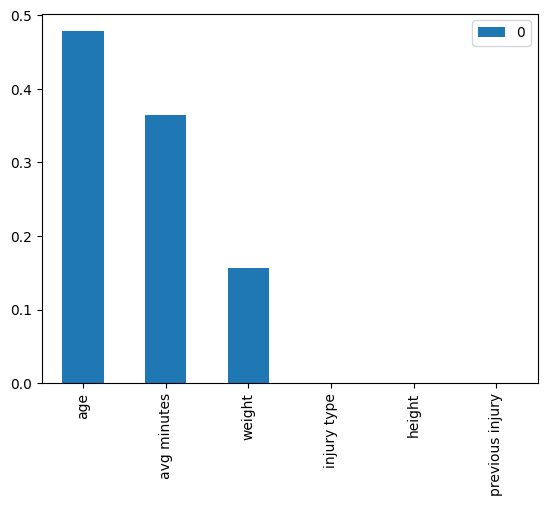

In [ ]:
importance = pd.DataFrame(clf.feature_importances_, index = features).sort_values(0, ascending=False)
importance.head(10).plot(kind='bar')

Visualization of Data

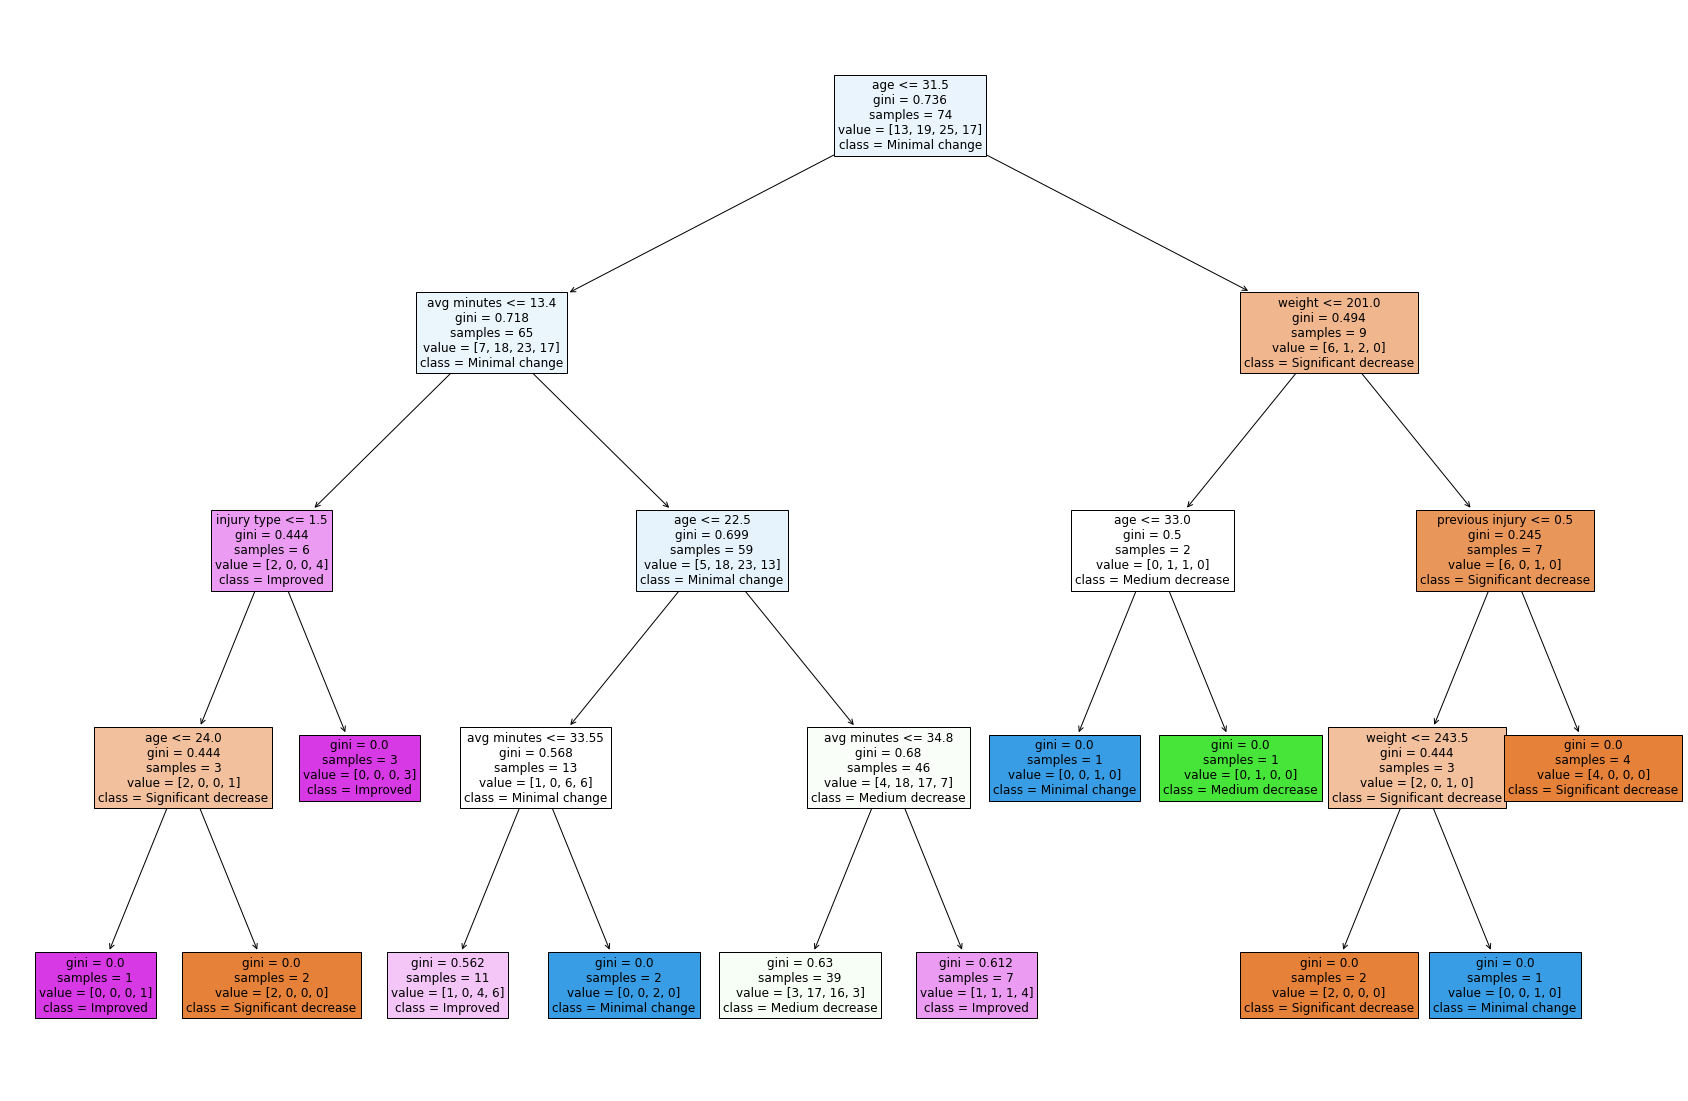

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(30, 20))
_ = tree.plot_tree(clf, feature_names = features, class_names = {0: 'Significant decrease', 1: 'Medium decrease', 2: 'Minimal change', 3: 'Improved'}, filled = True, fontsize=12)

XGBoost implementation

In [ ]:
import xgboost as xgb
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

param = {'max_depth': 4, 'eta': 0.3, 'objective': 'multi:softmax', 'num_class': 8}
model = xgb.train(param, train, 10)
predictions2 = model.predict(test)

print(predictions2)
accuracy_score(y_test, predictions2)

[2. 2. 3. 3. 2. 2. 4. 2. 3. 1. 3. 4. 2. 2. 3. 2. 4. 3. 3. 3. 3. 1. 4. 3.
 2. 3. 3. 3. 2. 4. 4. 2. 3. 4. 1. 3. 2. 3. 2.]


0.4358974358974359

Tree Visualization

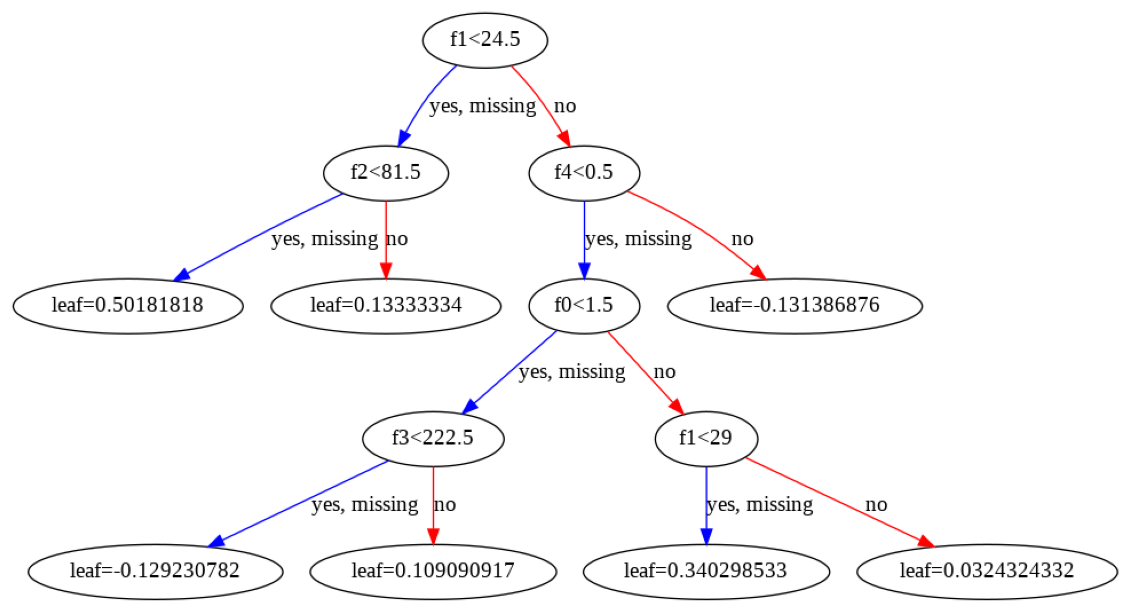

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

The LEBRON metric is actually a sum of the player's offensive LEBRON rating and defensive LEBRON rating, so I went back to the website and calculated the average difference for each of these and added it to the data set. Players who did not return were given values of -5 in these columns. These offensive and defensive differences were also assigned to classes in the same way as the LEBRON and BPM differences, found in the o-change and d-change columns. I also added a final column of the number of minutes the player averaged per game in the season before injury

Text(0.5, 0, 'O-LEBRON Diff')

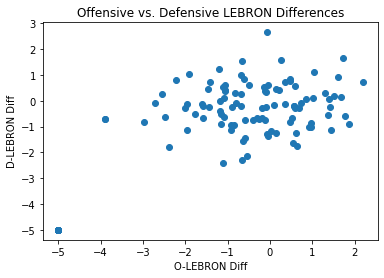

In [ ]:
offense = stats['O-LEBRON diff'].values
defense = stats['D-LEBRON diff'].values
plt.scatter(offense, defense)
plt.title('Offensive vs. Defensive LEBRON Differences')
plt.ylabel('D-LEBRON Diff')
plt.xlabel('O-LEBRON Diff')

A little bit less of a correlation here

Simple average minutes vs stat metric graphs

Text(0.5, 0, 'Average Minutes')

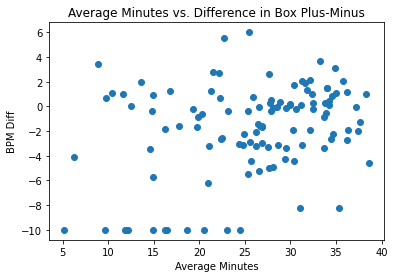

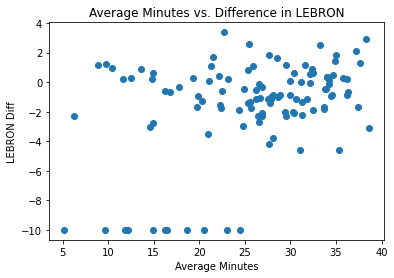

In [ ]:
min = stats['avg minutes'].values
plt.figure(0)
plt.scatter(min,bpm)
plt.title('Average Minutes vs. Difference in Box Plus-Minus')
plt.ylabel('BPM Diff')
plt.xlabel('Average Minutes')

plt.figure(1)
plt.scatter(min,leb)
plt.title('Average Minutes vs. Difference in LEBRON')
plt.ylabel('LEBRON Diff')
plt.xlabel('Average Minutes')

Also not much correlation here, but all the players who did not return from injury averaged less than 25 minutes per game, which is very interesting.

Text(0.5, 0, 'Height')

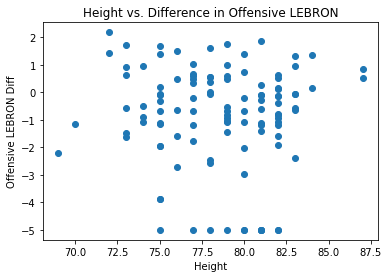

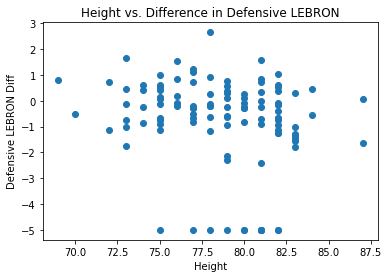

In [ ]:
plt.figure(0)
plt.scatter(height,offense)
plt.title('Height vs. Difference in Offensive LEBRON')
plt.ylabel('Offensive LEBRON Diff')
plt.xlabel('Height')

plt.figure(1)
plt.scatter(height,defense)
plt.title('Height vs. Difference in Defensive LEBRON')
plt.ylabel('Defensive LEBRON Diff')
plt.xlabel('Height')

Here I compared each of the four traits age, weight, height, and minutes averaged to difference in offensive and defensive LEBRON ratings. One interesting thing to note is that the spread of the difference in defensive LEBRON differences is much more concentrated, implying that these types of injuries have more varied effect on offensive play than defensive play. Now we take a look at each individual injury on offensive and defensive impact:

In [ ]:
acl = 0
num1 = 0
achilles = 0
num2 = 0
meniscus = 0
num3 = 0
for i in range(0,113):
  if(stats['O-LEBRON diff'].values[i] == -5):
    continue
  if(stats['injury type'].values[i] == 0):
    acl += stats['O-LEBRON diff'].values[i]
    num1 += 1
  elif(stats['injury type'].values[i] == 1):
    achilles += stats['O-LEBRON diff'].values[i]
    num2 += 1
  else:
    meniscus += stats['O-LEBRON diff'].values[i]
    num3 += 1

print(acl/num1,achilles/num2,meniscus/num3)

-0.37930555555555556 -0.7923076923076925 -0.02858974358974365


In [ ]:
acl = 0
num1 = 0
achilles = 0
num2 = 0
meniscus = 0
num3 = 0
for i in range(0,113):
  if(stats['D-LEBRON diff'].values[i] == -5):
    continue
  if(stats['injury type'].values[i] == 0):
    acl += stats['D-LEBRON diff'].values[i]
    num1 += 1
  elif(stats['injury type'].values[i] == 1):
    achilles += stats['D-LEBRON diff'].values[i]
    num2 += 1
  else:
    meniscus += stats['D-LEBRON diff'].values[i]
    num3 += 1

print(acl/num1,achilles/num2,meniscus/num3)

-0.001111111111111109 -0.17807692307692308 -0.42538461538461536


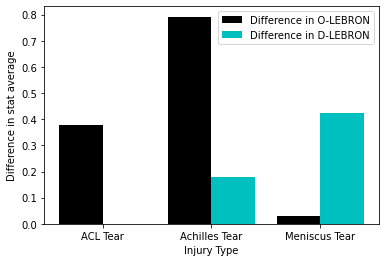

In [ ]:
x1 = ['ACL Tear', 'Achilles Tear', 'Meniscus Tear']
y1 = [0.379, 0.792, 0.029]
y2 = [0.001, 0.178, 0.425]
X_axis = np.arange(len(x1))

plt.bar(X_axis - 0.2, y1, 0.4, label = 'Difference in O-LEBRON', color='k')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'Difference in D-LEBRON', color='c')
plt.xticks(X_axis, x1)
plt.xlabel('Injury Type')
plt.ylabel('Difference in stat average')
#plt.title('Average Difference in Offensive and Defensive Performance by Injury')
plt.legend()

ACL and Achilles tears had very little impact on defensive rating compared with offensive rating, while the opposite was true for meniscus tears.

Decision Tree and XGBoost on Offensive and Defensive Performance

Offense

In [ ]:
clf1 = DecisionTreeClassifier(max_depth = 4)

y1 = stats['o-change'].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(standard, y1, test_size=0.33)
y_train1 = y_train1.astype('int')
y_test1 = y_test1.astype('int')
clf1 = clf1.fit(X_train1, y_train1)

In [ ]:
predictions1 = clf1.predict(X_test1)
accuracy_score(y_test1, predictions1)

0.2894736842105263

In [ ]:
confusion_matrix(y_test1, predictions1, labels = [1,2,3,4])

array([[1, 6, 1, 5],
       [2, 5, 0, 2],
       [0, 4, 0, 1],
       [0, 4, 0, 7]])

<Axes: >

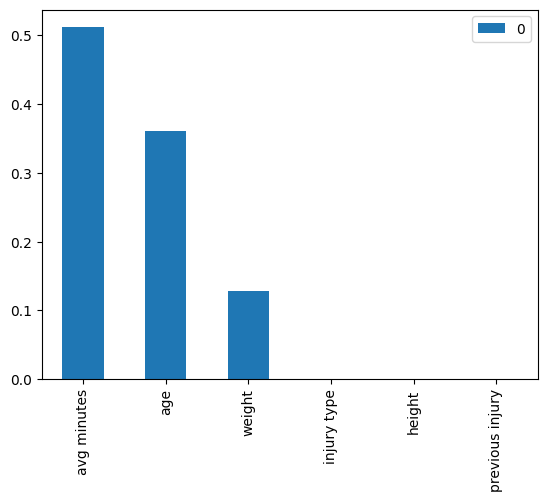

In [ ]:
importance1 = pd.DataFrame(clf1.feature_importances_, index = features).sort_values(0, ascending=False)
importance1.head(10).plot(kind='bar')

In [ ]:
train1 = xgb.DMatrix(X_train1, label = y_train1)
test1 = xgb.DMatrix(X_test1, label = y_test1)

param = {'max_depth': 4, 'eta': 0.3, 'objective': 'multi:softmax', 'num_class': 8}
model1 = xgb.train(param, train1, 10)
predictions3 = model1.predict(test1)

print(predictions3)
accuracy_score(y_test1, predictions3)

[1. 4. 4. 2. 1. 2. 3. 2. 2. 4. 1. 4. 1. 2. 2. 4. 4. 4. 1. 2. 4. 2. 4. 4.
 4. 4. 1. 4. 2. 1. 3. 2. 1. 4. 3. 4. 2. 4.]


0.34210526315789475

Defense

In [ ]:
clf2 = DecisionTreeClassifier(max_depth = 4)

y2 = stats['d-change'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(standard, y2, test_size=0.34)
y_train2 = y_train2.astype('int')
y_test2 = y_test2.astype('int')
clf2 = clf2.fit(X_train2, y_train2)

In [ ]:
predictions4 = clf2.predict(X_test2)
accuracy_score(y_test2, predictions4)

0.28205128205128205

<Axes: >

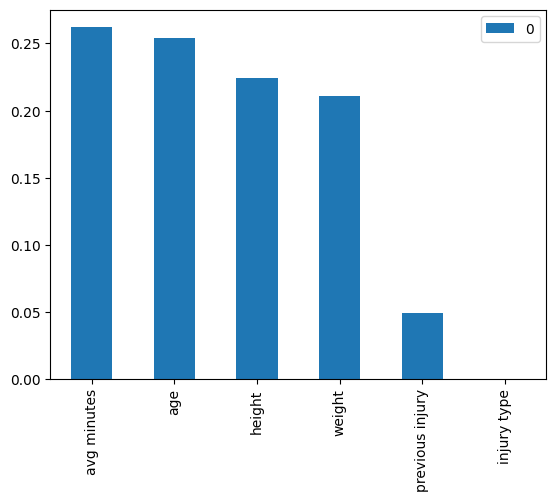

In [ ]:
importance2 = pd.DataFrame(clf2.feature_importances_, index = features).sort_values(0, ascending=False)
importance2.head(10).plot(kind='bar')

In [ ]:
train2 = xgb.DMatrix(X_train2, label = y_train2)
test2 = xgb.DMatrix(X_test2, label = y_test2)

param = {'max_depth': 4, 'eta': 0.3, 'objective': 'multi:softmax', 'num_class': 8}
model = xgb.train(param, train2, 10)
predictions5 = model.predict(test2)

print(predictions5)
accuracy_score(y_test2, predictions5)

[3. 4. 4. 3. 3. 4. 2. 2. 4. 3. 2. 4. 2. 4. 4. 3. 3. 4. 2. 2. 3. 4. 4. 3.
 4. 2. 2. 2. 1. 4. 3. 2. 2. 4. 4. 3. 3. 4. 2.]


0.23076923076923078

Comparing players who were injured previously to those who were not


In [ ]:
bpm1 = 0
leb1 = 0
oleb1 = 0
dleb1 = 0
num1 = 0
bpm2 = 0
leb2 = 0
oleb2 = 0
dleb2 = 0
num2 = 0

for i in range(0,113):
  if(stats['BPM diff'].values[i] == -10):
    continue
  if(stats['previous injury'].values[i] == 0):
    bpm1 += stats['BPM diff'].values[i]
    leb1 += stats['LEBRON diff'].values[i]
    oleb1 += stats['O-LEBRON diff'].values[i]
    dleb1 += stats['D-LEBRON diff'].values[i]
    num1 += 1
  else:
    bpm2 += stats['BPM diff'].values[i]
    leb2 += stats['LEBRON diff'].values[i]
    oleb2 += stats['O-LEBRON diff'].values[i]
    dleb2 += stats['D-LEBRON diff'].values[i]
    num2 += 1

print(bpm1/num1,leb1/num1,oleb1/num1,dleb1/num1)
print(bpm2/num2,leb2/num2,oleb2/num2,dleb2/num2)

-0.6408536585365854 -0.371341463414634 -0.24829268292682935 -0.10615853658536585
-2.005263157894737 -1.4442105263157894 -0.7900000000000001 -0.6607894736842106


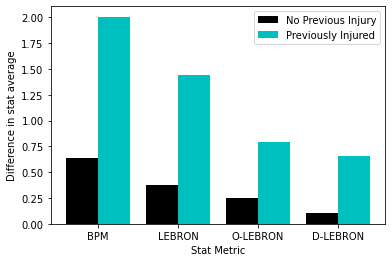

In [ ]:
x1 = ['BPM', 'LEBRON', 'O-LEBRON', 'D-LEBRON']
y1 = [0.641, 0.371, 0.248, 0.106]
y2 = [2.005, 1.444, 0.790, 0.661]
X_axis = np.arange(len(x1))

plt.bar(X_axis - 0.2, y1, 0.4, label = 'No Previous Injury', color='k')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'Previously Injured', color='c')
plt.xticks(X_axis, x1)
plt.xlabel('Stat Metric')
plt.ylabel('Difference in stat average')
#plt.title('Average Difference in Performance based on Injury History')
plt.legend()

In [ ]:
injury = 0
non = 0
for i in range(0,113):
  if(stats['BPM diff'].values[i] == -10):
    if(stats['previous injury'].values[i] == 1):
      injury += 1
    else:
      non += 1
print(injury,non)

6 6
